# Tutorial 4: Special Cases and Percularities of the Cutting Edge Algorithms
## What to expect: Three cautionary tales
Hello everybody, welcme to our last tutorial, with 3 examplatory cases which display the general limits of applicability of the technique. The first case will stress that this search for an optimal cut is done via a greedy algorithm and therefore is not guranteed to find the globally best cut. Second we demonstrate that how absolute values of edge priority scale but keep their ranking in case of changing the graining of paths in the networks. And the last case will be basically a bunch of miscellaneous fun facts to keep in mind about the cutting edge algorithm. Let's start by loading the ususal dependecies.

In [3]:
# import external modules
import networkx as nx
import numpy as np

# import local module to create entangled toy models
import snarlpy.tangledGenerators as tg
import snarlpy.edgePriority as itwe
import layoutPlots as lyp

### Case 1: Ambiguity of optimal cuts
As you might recall from Tutorial 3, our algorithm does identify an optimal cut based on the current distribution of edge priorities, this approach can identify multiple cut options during the procedure, e.g. the example below ist unlinked by performing three cuts, These could either be done from the outer margins of the hexagonal grid (as done with [(12,24), (19,20), (10,21)]) but an alternative route could have to cut the 'inner' edges (namely [(14,26), (16,28), (18,30)]) of the hexagonal grid to remove the Hopf link. 

In [61]:
#create linked graphs       
D = tg.createLabelHexagonHopfed(num_hex=2, num_ring=5)
for i, khf in enumerate(D.layer): 

    print('Graph Info')
    print(nx.info(khf.G))
    
#group graphs and compute optimal cuts
graph_sets = [k.G for k in D.layer]

p, lk_mat=itwe.getEdgeLinkageOperator(graph_sets)
init_cut_sets = [graph_sets[:], graph_sets[::-1]]
cut_lists = []
for ics in init_cut_sets:
    cut_lists.append(itwe.cuttingEdgeAlgorithm(*ics))

#lyp.plotLambdaMaps(p)
lyp.update_priorityPlot(D, p)

print('Cut list networks [#1, #2]')
print(cut_lists)

Graph Info
Name: 
Type: Graph
Number of nodes: 4
Number of edges: 4
Average degree:   2.0000
Graph Info
Name: 
Type: Graph
Number of nodes: 58
Number of edges: 77
Average degree:   2.6552


Cut list networks [#1, #2]
[[(0, 1)], [(12, 24), (19, 20), (10, 21)]]


Now, how ever you spin it, the optimal cut we find in the hexagonal grid is at least removing three edges from it. Which is the global optimum, there is now way you could remove less edges from the grid and unlink it. That result can be skewed though, for example considering the case below, where the resize the grid and shift the ring a bit, but leave the ring close to the 'surface'/outer margin of the grid.

Graph Info
Name: 
Type: Graph
Number of nodes: 4
Number of edges: 4
Average degree:   2.0000
Graph Info
Name: 
Type: Graph
Number of nodes: 110
Number of edges: 151
Average degree:   2.7455


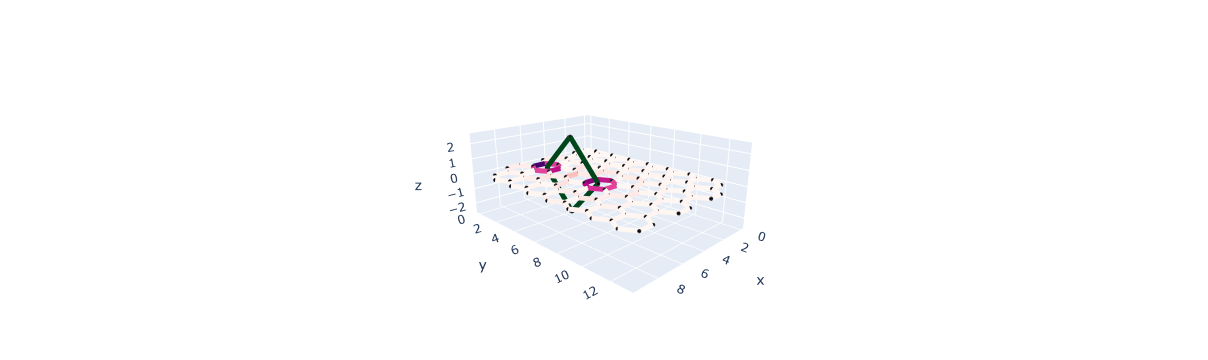

Cut list
[[(0, 1)], [(48, 64), (70, 71), (85, 86), (99, 100)]]


In [8]:
#create linked graphs       
D = tg.createLabelHexagonHopfed(num_hex=3, num_ring=5, coord_ring=[2.5, 5.5, 4.25])
for i, khf in enumerate(D.layer): 

    print('Graph Info')
    print(nx.info(khf.G))
    
#group graphs and compute optimal cuts
graph_sets = [k.G for k in D.layer]

p, lk_mat=itwe.getEdgeLinkageOperator(graph_sets)
init_cut_sets = [graph_sets[:], graph_sets[::-1]]
cut_lists = []
for ics in init_cut_sets:
    cut_lists.append(itwe.cuttingEdgeAlgorithm(*ics))

#lyp.plotLambdaMaps(p)
lyp.update_priorityPlot(D, p)

print('Cut list [#1, #2]')
print(cut_lists)

Well, now we see that we need to cut four edges apparently to unlink the hexagon. It seems our algorithm cuts the out edge with highest priority first and removes edges from inside out until we unlink. Even though the global optimal cut is still the removal of just three inner edges [(50,66),(52,68),(54,70)]. The general problem here is that outer edges, lying on the 'surface' tend to have higher edge priorities and are therefore chosen first in our greedy algorithm even though they lead us slightly astray finding the optimal cut.

### Case 2: Absolute values of edge priority and ranking
Here we want to demonstrate that it doesnt matter for the ranking of the priorities given that we resize cyles in either networks, e.g. by adding extra edges in a path which forms an arc of an otherwise linked cycle. First we will resize the ring and show that its only the absolute values, e.g. look at edge (12,24) in the hexagonal grid where we can see the values plummeting for increased number of edge of the ring. Nevertheless the optimal cut we find stays the same.

Graph Info
Name: 
Type: Graph
Number of nodes: 4
Number of edges: 4
Average degree:   2.0000
Graph Info
Name: 
Type: Graph
Number of nodes: 58
Number of edges: 77
Average degree:   2.6552


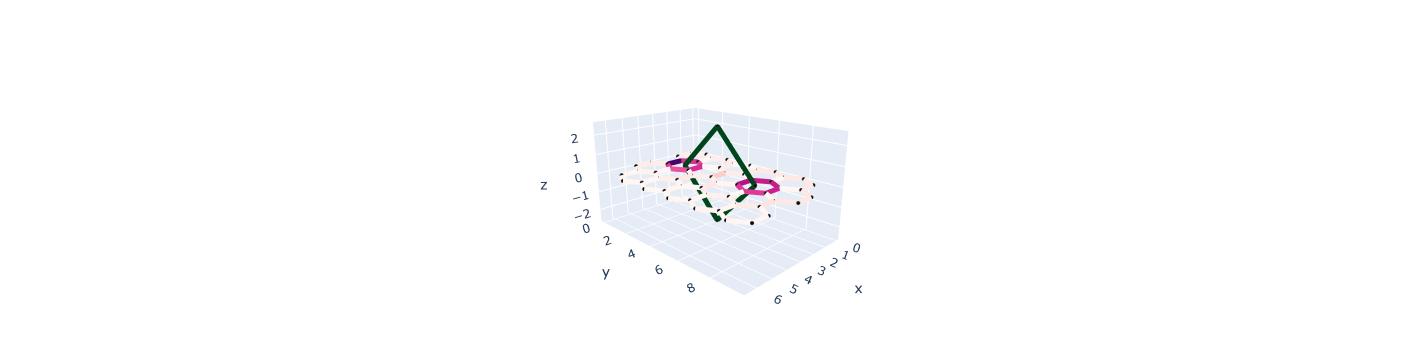

Cut list networks [#1, #2]
[[(0, 1)], [(12, 24), (19, 20), (10, 21)]]
Graph Info
Name: 
Type: Graph
Number of nodes: 14
Number of edges: 14
Average degree:   2.0000
Graph Info
Name: 
Type: Graph
Number of nodes: 58
Number of edges: 77
Average degree:   2.6552


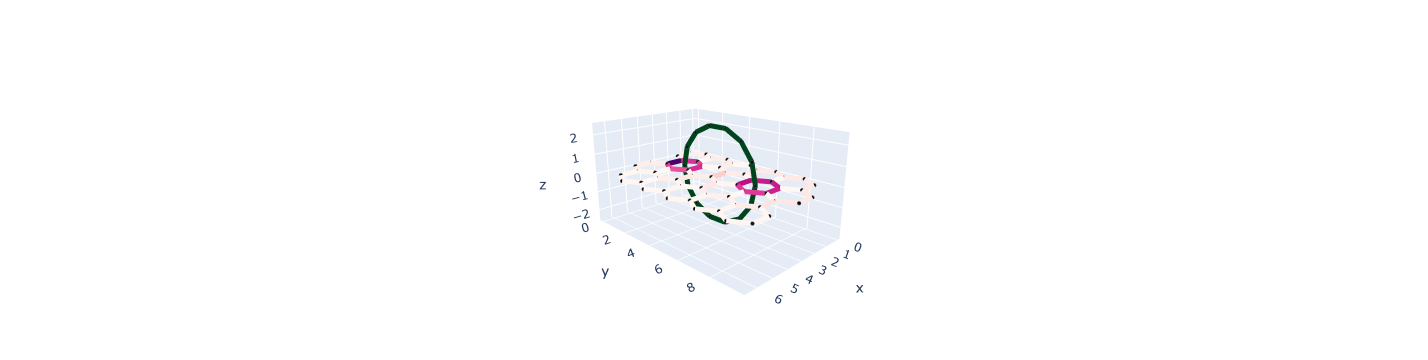

Cut list networks [#1, #2]
[[(0, 13)], [(12, 24), (19, 20), (10, 21)]]
Graph Info
Name: 
Type: Graph
Number of nodes: 49
Number of edges: 49
Average degree:   2.0000
Graph Info
Name: 
Type: Graph
Number of nodes: 58
Number of edges: 77
Average degree:   2.6552


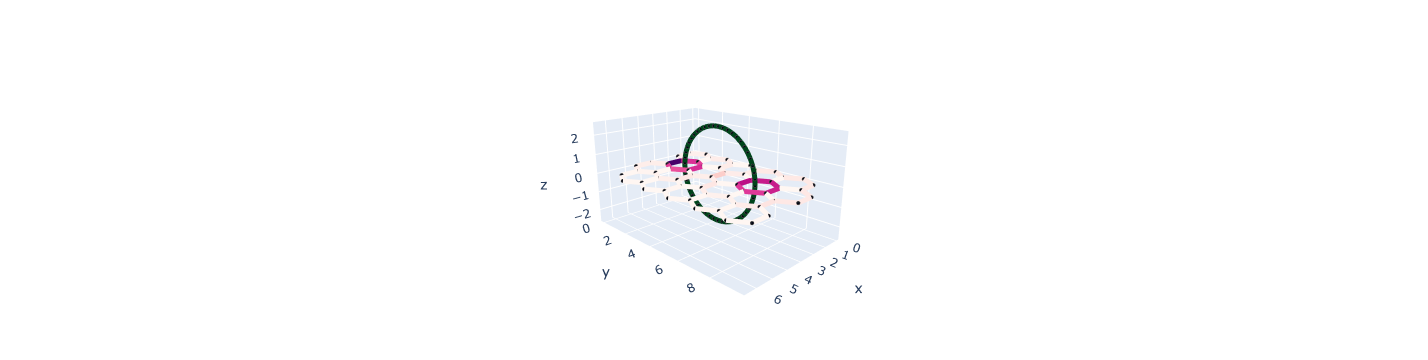

Cut list networks [#1, #2]
[[(0, 48)], [(12, 24), (19, 20), (8, 9)]]


In [11]:
#create linked graphs       
for j in [5, 15, 50]:
    D = tg.createLabelHexagonHopfed(num_hex=2, num_ring=j)
    for i, khf in enumerate(D.layer): 

        print('Graph Info')
        print(nx.info(khf.G))

    #group graphs and compute optimal cuts
    graph_sets = [k.G for k in D.layer]

    p, lk_mat=itwe.getEdgeLinkageOperator(graph_sets)
    init_cut_sets = [graph_sets[:], graph_sets[::-1]]
    cut_lists = []
    for ics in init_cut_sets:
        cut_lists.append(itwe.cuttingEdgeAlgorithm(*ics))

    #lyp.plotLambdaMaps(p)
    lyp.update_priorityPlot(D, p)

    print('Cut list networks [#1, #2]')
    print(cut_lists)

Well how about we resize paths in the hexagonal grid instead, e.g increase the number of edges in the crucial outer edge (12,24) , or an inner one like (18,30) or a seemingly unimportant one at the peripherie like (46,57) by adding a few new nodes. Here you will see that resizing the paths can lead towards a re-ranking of paths. E.g. adding extra nodes into the crucial path/edge (12,24) may decrese its priority values to a degree that inner edge are prefered for making a cut. Periphal path tinkering with (46,57) usually has no such effect.

In [59]:
import numpy as np
import kirchhoff.init_dual as kci
import kirchhoff.circuit_dual as kcd
def createNewHexagonUpdateEdge(edge):
    
    D = tg.createLabelHexagonHopfed(num_hex=2, num_ring=5)
    D.layer[1].G = replaceEdgeByLongerPath(D.layer[1].G, edge)
    
    d = kci.NetworkxDual()
    d.layer = [D.layer[0].G , D.layer[1].G ]
    D = kcd.DualCircuit(kcd.construct_from_graphSet(d))
    D = tg.set_print_labels(D)
    
    return D

def replaceEdgeByLongerPath(G, edge):
 
    G.remove_edge(*edge)
    pos = nx.get_node_attributes(G, 'pos')
    
    stdNumNewNodes = 5 # new number of nodes - 2 
    p0 = pos[edge[0]]
    p1 = pos[edge[1]]
    
    dp = p0 - p1
    T = np.linspace(0., 1.,stdNumNewNodes)

    npos = [t*dp + p1 for t in T[1:-1]]
    fNode = edge[1]
    numNodes = nx.number_of_nodes(G)+1
    
    for i, p in enumerate(npos):
        
        if i < len(npos)-1:
            sNode = numNodes+i
            
            G.add_node(sNode, pos = p)
            G.add_edge(fNode, sNode)
            fNode = sNode  
        else:
            G.add_edge(fNode, edge[0])
    
    return G

In [60]:
for edge in [(12,24), (18,30), (46,57)]:
    
    #create linked graphs       
    D = createNewHexagonUpdateEdge(edge)
    #group graphs and compute optimal cuts
    graph_sets = [k.G for k in D.layer]

    p, lk_mat=itwe.getEdgeLinkageOperator(graph_sets)
    init_cut_sets = [graph_sets[:], graph_sets[::-1]]
    cut_lists = []
    for ics in init_cut_sets:
        cut_lists.append(itwe.cuttingEdgeAlgorithm(*ics))

    #lyp.plotLambdaMaps(p)
    fig = lyp.update_priorityPlot(D, p)
    
    print('Cut list networks [#1, #2]')
    print(cut_lists)

Cut list networks [#1, #2]
[[(0, 1)], [(19, 20), (12, 59), (9, 10)]]


Cut list networks [#1, #2]
[[(0, 1)], [(12, 24), (20, 32), (21, 22)]]


Cut list networks [#1, #2]
[[(0, 1)], [(12, 24), (19, 20), (10, 21)]]
